# Lesson 1 - ImageNet pretrained ResNet34 with STONEFLY9 dataset

In this notebook a ImageNet pretrained ResNet is trained on the STONEFLY9 dataset (http://web.engr.oregonstate.edu/~tgd/bugid/stonefly9/).

## Notebook setup

In [1]:
# notebook setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import fastai library
from fastai import *
from fastai.vision import *

## Data setup

In [3]:
# set path to data directory
path = Path('/home/paperspace/fastai/data/stonefly')

### Download data

In [6]:
# get low-resolution STONEFLY9 dataset
!wget http://web.engr.oregonstate.edu/~tgd/bugid/stonefly9/JPEG_lowRes.tar.gz -P /home/paperspace/fastai/data/stonefly/

--2018-10-26 13:27:35--  http://web.engr.oregonstate.edu/~tgd/bugid/stonefly9/JPEG_lowRes.tar.gz
Resolving web.engr.oregonstate.edu (web.engr.oregonstate.edu)... 128.193.40.12
Connecting to web.engr.oregonstate.edu (web.engr.oregonstate.edu)|128.193.40.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 526140670 (502M) [application/x-gzip]
Saving to: ‘/home/paperspace/fastai/data/stonefly/JPEG_lowRes.tar.gz’

JPEG_lowRes.tar.gz  100%[===================>] 501.77M  13.7MB/s    in 42s     

2018-10-26 13:28:18 (11.9 MB/s) - ‘/home/paperspace/fastai/data/stonefly/JPEG_lowRes.tar.gz’ saved [526140670/526140670]



In [19]:
# unzip JPEG_lowRes.tar.gz file into stonefly directory
!tar -xvzf /home/paperspace/fastai/data/stonefly/JPEG_lowRes.tar.gz -C /home/paperspace/fastai/data/stonefly/

JPEG_lowRes/
JPEG_lowRes/hes/
JPEG_lowRes/hes/set0/
JPEG_lowRes/hes/set0/Hesp_15-specimen-i001-s125.jpg
JPEG_lowRes/hes/set0/Hesp_44-specimen-i004-s125.jpg
JPEG_lowRes/hes/set0/Hesp_270-specimen-i002-s125.jpg
JPEG_lowRes/hes/set0/Hesp_36-specimen-i004-s125.jpg
JPEG_lowRes/hes/set0/Hesp_12-specimen-i003-s125.jpg
JPEG_lowRes/hes/set0/Hesp_4-specimen-i004-s125.jpg
JPEG_lowRes/hes/set0/Hesp_10-specimen-i005-s125.jpg
JPEG_lowRes/hes/set0/Hesp_106-specimen-i001-s125.jpg
JPEG_lowRes/hes/set0/Hesp_6-specimen-i002-s125.jpg
JPEG_lowRes/hes/set0/Hesp_46-specimen-i002-s125.jpg
JPEG_lowRes/hes/set0/Hesp_272-specimen-i004-s125.jpg
JPEG_lowRes/hes/set0/Hesp_271-specimen-i005-s125.jpg
JPEG_lowRes/hes/set0/Hesp_9-specimen-i001-s125.jpg
JPEG_lowRes/hes/set0/Hesp_45-specimen-i003-s125.jpg
JPEG_lowRes/hes/set0/Hesp_5-specimen-i003-s125.jpg
JPEG_lowRes/hes/set0/Hesp_42-specimen-i001-s125.jpg
JPEG_lowRes/hes/set0/Hesp_37-specimen-i003-s125.jpg
JPEG_lowRes/hes/set0/Hesp_13-specimen-i004-s125.jpg
JPEG_lowRes/

JPEG_lowRes/hes/set1/Hesp_276-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_374-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_387-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_393-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_386-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_375-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_277-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_284-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_286-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_384-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_377-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_369-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_391-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_392-specimen-i003-s125.jpg
JPEG_lowRes/hes/set1/Hesp_282-specimen-i001-s125.jpg
JPEG_lowRes/hes/set1/Hesp_387-specimen-i005-s125.jpg
JPEG_lowRes/hes/set1/Hesp_374-specimen-i005-s125.jpg
JPEG_lowRes/hes/set1/Hesp_395-specimen-i001-s125.jpg
JPEG_lowRes/hes/set1/Hesp_276-specimen-i003-s1

JPEG_lowRes/hes/set1/Hesp_389-specimen-i005-s125.jpg
JPEG_lowRes/hes/set1/Hesp_287-specimen-i001-s125.jpg
JPEG_lowRes/hes/set1/Hesp_387-specimen-i001-s125.jpg
JPEG_lowRes/hes/set1/Hesp_374-specimen-i001-s125.jpg
JPEG_lowRes/hes/set1/Hesp_395-specimen-i005-s125.jpg
JPEG_lowRes/hes/set1/Hesp_282-specimen-i005-s125.jpg
JPEG_lowRes/hes/set1/Hesp_378-specimen-i003-s125.jpg
JPEG_lowRes/hes/set1/Hesp_373-specimen-i003-s125.jpg
JPEG_lowRes/hes/set1/Hesp_380-specimen-i003-s125.jpg
JPEG_lowRes/hes/set1/Hesp_279-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_370-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_383-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_388-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_281-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_394-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_379-specimen-i004-s125.jpg
JPEG_lowRes/hes/set1/Hesp_283-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_288-specimen-i002-s125.jpg
JPEG_lowRes/hes/set1/Hesp_372-specimen-i004-s1

JPEG_lowRes/pte/set0/Pte_43-specimen-i003-s125.jpg
JPEG_lowRes/pte/set0/Pte_26-specimen-i003-s125.jpg
JPEG_lowRes/pte/set0/Pte_38-specimen-i005-s125.jpg
JPEG_lowRes/pte/set0/Pte_26-specimen-i005-s125.jpg
JPEG_lowRes/pte/set0/Pte_34-specimen-i001-s125.jpg
JPEG_lowRes/pte/set0/Pte_38-specimen-i003-s125.jpg
JPEG_lowRes/pte/set0/Pte_23-specimen-i001-s125.jpg
JPEG_lowRes/pte/set0/Pte_31-specimen-i005-s125.jpg
JPEG_lowRes/pte/set0/Pte_43-specimen-i005-s125.jpg
JPEG_lowRes/pte/set0/Pte_5-specimen-i006-s125.jpg
JPEG_lowRes/pte/set0/Pte_16-specimen-i003-s125.jpg
JPEG_lowRes/pte/set0/Pte_55-specimen-i002-s125.jpg
JPEG_lowRes/pte/set0/Pte_39-specimen-i004-s125.jpg
JPEG_lowRes/pte/set0/Pte_30-specimen-i002-s125.jpg
JPEG_lowRes/pte/set0/Pte_14-specimen-i005-s125.jpg
JPEG_lowRes/pte/set0/Pte_4-specimen-i001-s125.jpg
JPEG_lowRes/pte/set0/Pte_49-specimen-i002-s125.jpg
JPEG_lowRes/pte/set0/Pte_25-specimen-i004-s125.jpg
JPEG_lowRes/pte/set0/Pte_31-specimen-i002-s125.jpg
JPEG_lowRes/pte/set0/Pte_43-speci

JPEG_lowRes/pte/set1/Pte_62-specimen-i005-s125.jpg
JPEG_lowRes/pte/set1/Pte_85-specimen-i003-s125.jpg
JPEG_lowRes/pte/set1/Pte_76-specimen-i003-s125.jpg
JPEG_lowRes/pte/set1/Pte_63-specimen-i005-s125.jpg
JPEG_lowRes/pte/set1/Pte_77-specimen-i004-s125.jpg
JPEG_lowRes/pte/set1/Pte_62-specimen-i002-s125.jpg
JPEG_lowRes/pte/set1/Pte_86-specimen-i002-s125.jpg
JPEG_lowRes/pte/set1/Pte_62-specimen-i001-s125.jpg
JPEG_lowRes/pte/set1/Pte_86-specimen-i001-s125.jpg
JPEG_lowRes/pte/set1/Pte_81-specimen-i003-s125.jpg
JPEG_lowRes/pte/set1/Pte_72-specimen-i003-s125.jpg
JPEG_lowRes/pte/set1/Pte_64-specimen-i004-s125.jpg
JPEG_lowRes/pte/set1/Pte_80-specimen-i004-s125.jpg
JPEG_lowRes/pte/set1/Pte_78-specimen-i004-s125.jpg
JPEG_lowRes/pte/set1/Pte_72-specimen-i004-s125.jpg
JPEG_lowRes/pte/set1/Pte_81-specimen-i004-s125.jpg
JPEG_lowRes/pte/set1/Pte_78-specimen-i003-s125.jpg
JPEG_lowRes/pte/set1/Pte_80-specimen-i003-s125.jpg
JPEG_lowRes/pte/set1/Pte_63-specimen-i001-s125.jpg
JPEG_lowRes/pte/set1/Pte_64-spe

JPEG_lowRes/zap/set2/Zap_79-specimen-i004-s125.jpg
JPEG_lowRes/zap/set2/Zap_94-specimen-i002-s125.jpg
JPEG_lowRes/zap/set2/Zap_97-specimen-i003-s125.jpg
JPEG_lowRes/zap/set2/Zap_89-specimen-i005-s125.jpg
JPEG_lowRes/zap/set2/Zap_82-specimen-i005-s125.jpg
JPEG_lowRes/zap/set2/Zap_90-specimen-i001-s125.jpg
JPEG_lowRes/zap/set2/Zap_80-specimen-i003-s125.jpg
JPEG_lowRes/zap/set2/Zap_78-specimen-i003-s125.jpg
JPEG_lowRes/zap/set2/Zap_87-specimen-i001-s125.jpg
JPEG_lowRes/zap/set2/Zap_95-specimen-i005-s125.jpg
JPEG_lowRes/zap/set2/Zap_79-specimen-i003-s125.jpg
JPEG_lowRes/zap/set2/Zap_81-specimen-i003-s125.jpg
JPEG_lowRes/zap/set2/Zap_94-specimen-i005-s125.jpg
JPEG_lowRes/zap/set2/Zap_86-specimen-i001-s125.jpg
JPEG_lowRes/zap/set2/Zap_96-specimen-i003-s125.jpg
JPEG_lowRes/zap/set2/Zap_91-specimen-i001-s125.jpg
JPEG_lowRes/zap/set2/Zap_83-specimen-i005-s125.jpg
JPEG_lowRes/zap/set2/Zap_88-specimen-i005-s125.jpg
JPEG_lowRes/zap/set2/Zap_78-specimen-i004-s125.jpg
JPEG_lowRes/zap/set2/Zap_80-spe

JPEG_lowRes/zap/set0/Zap_45-specimen-i003-s125.jpg
JPEG_lowRes/zap/set0/Zap_5-specimen-i005-s124.jpg
JPEG_lowRes/zap/set0/Zap_20-specimen-i002-s124.jpg
JPEG_lowRes/zap/set0/Zap_16-specimen-i001-s124.jpg
JPEG_lowRes/zap/set0/Zap_28-specimen-i003-s124.jpg
JPEG_lowRes/zap/set0/Zap_23-specimen-i003-s124.jpg
JPEG_lowRes/zap/set0/Zap_6-specimen-i004-s124.jpg
JPEG_lowRes/zap/set0/Zap_19-specimen-i002-s124.jpg
JPEG_lowRes/zap/set0/Zap_12-specimen-i002-s124.jpg
JPEG_lowRes/zap/set0/Zap_24-specimen-i001-s124.jpg
JPEG_lowRes/zap/set0/Zap_34-specimen-i002-s125.jpg
JPEG_lowRes/zap/set0/Zap_10-specimen-i004-s124.jpg
JPEG_lowRes/zap/set0/Zap_36-specimen-i004-s125.jpg
JPEG_lowRes/zap/set0/Zap_21-specimen-i005-s124.jpg
JPEG_lowRes/zap/set0/Zap_44-specimen-i004-s125.jpg
JPEG_lowRes/zap/set0/Zap_4-specimen-i002-s124.jpg
JPEG_lowRes/zap/set0/Zap_37-specimen-i004-s125.jpg
JPEG_lowRes/zap/set0/Zap_11-specimen-i004-s124.jpg
JPEG_lowRes/zap/set0/Zap_5-specimen-i002-s124.jpg
JPEG_lowRes/zap/set0/Zap_45-specime

JPEG_lowRes/cal/set1/Cal_37-specimen-i005-s125.jpg
JPEG_lowRes/cal/set1/Cal_50-specimen-i003-s125.jpg
JPEG_lowRes/cal/set1/Cal_65-specimen-i001-s125.jpg
JPEG_lowRes/cal/set1/Cal_53-specimen-i002-s125.jpg
JPEG_lowRes/cal/set1/Cal_58-specimen-i002-s125.jpg
JPEG_lowRes/cal/set1/Cal_46-specimen-i004-s125.jpg
JPEG_lowRes/cal/set1/Cal_62-specimen-i003-s125.jpg
JPEG_lowRes/cal/set1/Cal_69-specimen-i003-s125.jpg
JPEG_lowRes/cal/set1/Cal_60-specimen-i005-s125.jpg
JPEG_lowRes/cal/set1/Cal_36-specimen-i002-s125.jpg
JPEG_lowRes/cal/set1/Cal_51-specimen-i004-s125.jpg
JPEG_lowRes/cal/set1/Cal_60-specimen-i003-s125.jpg
JPEG_lowRes/cal/set1/Cal_36-specimen-i004-s125.jpg
JPEG_lowRes/cal/set1/Cal_51-specimen-i002-s125.jpg
JPEG_lowRes/cal/set1/Cal_67-specimen-i001-s125.jpg
JPEG_lowRes/cal/set1/Cal_53-specimen-i004-s125.jpg
JPEG_lowRes/cal/set1/Cal_58-specimen-i004-s125.jpg
JPEG_lowRes/cal/set1/Cal_46-specimen-i002-s125.jpg
JPEG_lowRes/cal/set1/Cal_62-specimen-i005-s125.jpg
JPEG_lowRes/cal/set1/Cal_69-spe

JPEG_lowRes/cal/set2/Cal_97-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_71-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_82-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_89-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_78-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_73-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_80-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_95-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_81-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_72-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_79-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_94-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_96-specimen-i004-s125.jpg
JPEG_lowRes/cal/set2/Cal_100-specimen-i001-s125.jpg
JPEG_lowRes/cal/set2/Cal_88-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_83-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_70-specimen-i002-s125.jpg
JPEG_lowRes/cal/set2/Cal_80-specimen-i003-s125.jpg
JPEG_lowRes/cal/set2/Cal_73-specimen-i003-s125.jpg
JPEG_lowRes/cal/set2/Cal_78-sp

JPEG_lowRes/cal/set0/Cal_5-specimen-i003-s125.jpg
JPEG_lowRes/cal/set0/Cal_34-specimen-i005-s125.jpg
JPEG_lowRes/cal/set0/Cal_10-specimen-i002-s125.jpg
JPEG_lowRes/cal/set0/Cal_26-specimen-i001-s125.jpg
JPEG_lowRes/cal/set0/Cal_21-specimen-i003-s125.jpg
JPEG_lowRes/cal/set0/Cal_31-specimen-i001-s125.jpg
JPEG_lowRes/cal/set0/Cal_23-specimen-i005-s125.jpg
JPEG_lowRes/cal/set0/Cal_28-specimen-i005-s125.jpg
JPEG_lowRes/cal/set0/Cal_12-specimen-i004-s125.jpg
JPEG_lowRes/cal/set0/Cal_19-specimen-i004-s125.jpg
JPEG_lowRes/cal/set0/Cal_2-specimen-i002-s125.jpg
JPEG_lowRes/cal/set0/Cal_9-specimen-i002-s125.jpg
JPEG_lowRes/cal/set0/Cal_1-specimen-i003-s125.jpg
JPEG_lowRes/cal/set0/Cal_11-specimen-i005-s125.jpg
JPEG_lowRes/cal/set0/Cal_6-specimen-i001-s125.jpg
JPEG_lowRes/cal/set0/Cal_20-specimen-i004-s125.jpg
JPEG_lowRes/cal/set0/Cal_22-specimen-i002-s125.jpg
JPEG_lowRes/cal/set0/Cal_14-specimen-i001-s125.jpg
JPEG_lowRes/cal/set0/Cal_29-specimen-i002-s125.jpg
JPEG_lowRes/cal/set0/Cal_3-specimen-

JPEG_lowRes/mos/set0/Mos_1-specimen-i002-s124.jpg
JPEG_lowRes/mos/set0/Mos_2-specimen-i004-s124.jpg
JPEG_lowRes/mos/set0/Mos_9-specimen-i004-s124.jpg
JPEG_lowRes/mos/set0/Mos_1-specimen-i005-s124.jpg
JPEG_lowRes/mos/set0/Mos_4-specimen-i001-s124.jpg
JPEG_lowRes/mos/set0/Mos_3-specimen-i003-s124.jpg
JPEG_lowRes/mos/set0/Mos_8-specimen-i003-s124.jpg
JPEG_lowRes/mos/set0/Mos_6-specimen-i004-s124.jpg
JPEG_lowRes/mos/set0/Mos_4-specimen-i002-s124.jpg
JPEG_lowRes/mos/set0/Mos_7-specimen-i003-s124.jpg
JPEG_lowRes/mos/set0/Mos_5-specimen-i005-s124.jpg
JPEG_lowRes/mos/set0/Mos_4-specimen-i005-s124.jpg
JPEG_lowRes/mos/set0/Mos_6-specimen-i003-s124.jpg
JPEG_lowRes/mos/set0/Mos_1-specimen-i001-s124.jpg
JPEG_lowRes/mos/set0/Mos_5-specimen-i002-s124.jpg
JPEG_lowRes/mos/set0/Mos_7-specimen-i004-s124.jpg
JPEG_lowRes/mos/set0/Mos_7-specimen-i002-s124.jpg
JPEG_lowRes/mos/set0/Mos_5-specimen-i004-s124.jpg
JPEG_lowRes/mos/set0/Mos_6-specimen-i005-s124.jpg
JPEG_lowRes/mos/set0/Mos_8-specimen-i001-s124.jpg


JPEG_lowRes/dor/set0/Dor_1-specimen-i007-s125.jpg
JPEG_lowRes/dor/set0/Dor_1-specimen-i008-s125.jpg
JPEG_lowRes/dor/set0/Dor_17-specimen-i001-s125.jpg
JPEG_lowRes/dor/set0/Dor_21-specimen-i002-s125.jpg
JPEG_lowRes/dor/set0/Dor_6-specimen-i005-s125.jpg
JPEG_lowRes/dor/set0/Dor_10-specimen-i003-s125.jpg
JPEG_lowRes/dor/set0/Dor_34-specimen-i004-s125.jpg
JPEG_lowRes/dor/set0/Dor_4-specimen-i003-s125.jpg
JPEG_lowRes/dor/set0/Dor_19-specimen-i005-s125.jpg
JPEG_lowRes/dor/set0/Dor_36-specimen-i002-s125.jpg
JPEG_lowRes/dor/set0/Dor_12-specimen-i005-s125.jpg
JPEG_lowRes/dor/set0/Dor_8-specimen-i001-s125.jpg
JPEG_lowRes/dor/set0/Dor_3-specimen-i001-s125.jpg
JPEG_lowRes/dor/set0/Dor_28-specimen-i004-s125.jpg
JPEG_lowRes/dor/set0/Dor_23-specimen-i004-s125.jpg
JPEG_lowRes/dor/set0/Dor_20-specimen-i005-s125.jpg
JPEG_lowRes/dor/set0/Dor_32-specimen-i001-s125.jpg
JPEG_lowRes/dor/set0/Dor_11-specimen-i004-s125.jpg
JPEG_lowRes/dor/set0/Dor_35-specimen-i003-s125.jpg
JPEG_lowRes/dor/set0/Dor_7-specimen-i

JPEG_lowRes/dor/set1/Dor_48-specimen-i001-s125.jpg
JPEG_lowRes/dor/set1/Dor_75-specimen-i002-s125.jpg
JPEG_lowRes/dor/set1/Dor_51-specimen-i005-s125.jpg
JPEG_lowRes/dor/set1/Dor_43-specimen-i001-s125.jpg
JPEG_lowRes/dor/set1/Dor_44-specimen-i003-s125.jpg
JPEG_lowRes/dor/set1/Dor_60-specimen-i004-s125.jpg
JPEG_lowRes/dor/set1/Dor_42-specimen-i001-s125.jpg
JPEG_lowRes/dor/set1/Dor_37-specimen-i003-s125.jpg
JPEG_lowRes/dor/set1/Dor_50-specimen-i005-s125.jpg
JPEG_lowRes/dor/set1/Dor_74-specimen-i002-s125.jpg
JPEG_lowRes/dor/set1/Dor_61-specimen-i004-s125.jpg
JPEG_lowRes/dor/set1/Dor_45-specimen-i003-s125.jpg
JPEG_lowRes/dor/set1/Dor_68-specimen-i002-s125.jpg
JPEG_lowRes/dor/set1/Dor_47-specimen-i005-s125.jpg
JPEG_lowRes/dor/set1/Dor_63-specimen-i002-s125.jpg
JPEG_lowRes/dor/set1/Dor_55-specimen-i001-s125.jpg
JPEG_lowRes/dor/set1/Dor_59-specimen-i003-s125.jpg
JPEG_lowRes/dor/set1/Dor_52-specimen-i003-s125.jpg
JPEG_lowRes/dor/set1/Dor_51-specimen-i002-s125.jpg
JPEG_lowRes/dor/set1/Dor_75-spe

JPEG_lowRes/dor/set2/Dor_105-specimen-i005-s125.jpg
JPEG_lowRes/dor/set2/Dor_96-specimen-i003-s125.jpg
JPEG_lowRes/dor/set2/Dor_107-specimen-i003-s125.jpg
JPEG_lowRes/dor/set2/Dor_83-specimen-i005-s125.jpg
JPEG_lowRes/dor/set2/Dor_91-specimen-i001-s125.jpg
JPEG_lowRes/dor/set2/Dor_88-specimen-i005-s125.jpg
JPEG_lowRes/dor/set2/Dor_100-specimen-i001-s125.jpg
JPEG_lowRes/dor/set2/Dor_78-specimen-i004-s125.jpg
JPEG_lowRes/dor/set2/Dor_80-specimen-i004-s125.jpg
JPEG_lowRes/dor/set2/Dor_104-specimen-i002-s125.jpg
JPEG_lowRes/dor/set2/Dor_95-specimen-i002-s125.jpg
JPEG_lowRes/dor/set2/Dor_106-specimen-i004-s125.jpg
JPEG_lowRes/dor/set2/Dor_97-specimen-i004-s125.jpg
JPEG_lowRes/dor/set2/Dor_82-specimen-i002-s125.jpg
JPEG_lowRes/dor/set2/Dor_89-specimen-i002-s125.jpg
JPEG_lowRes/iso/
JPEG_lowRes/iso/set2/
JPEG_lowRes/iso/set2/Iso_97-specimen-i003-s125.jpg
JPEG_lowRes/iso/set2/Iso_100-specimen-i004-s125.jpg
JPEG_lowRes/iso/set2/Iso_89-specimen-i005-s125.jpg
JPEG_lowRes/iso/set2/Iso_82-specimen-

JPEG_lowRes/iso/set1/Iso_76-specimen-i004-s125.jpg
JPEG_lowRes/iso/set1/Iso_52-specimen-i003-s125.jpg
JPEG_lowRes/iso/set1/Iso_42-specimen-i001-s125.jpg
JPEG_lowRes/iso/set1/Iso_50-specimen-i005-s125.jpg
JPEG_lowRes/iso/set1/Iso_74-specimen-i002-s125.jpg
JPEG_lowRes/iso/set1/Iso_49-specimen-i001-s125.jpg
JPEG_lowRes/iso/set1/Iso_61-specimen-i004-s125.jpg
JPEG_lowRes/iso/set1/Iso_45-specimen-i003-s125.jpg
JPEG_lowRes/iso/set1/Iso_69-specimen-i005-s125.jpg
JPEG_lowRes/iso/set1/Iso_70-specimen-i001-s125.jpg
JPEG_lowRes/iso/set1/Iso_46-specimen-i002-s125.jpg
JPEG_lowRes/iso/set1/Iso_62-specimen-i005-s125.jpg
JPEG_lowRes/iso/set1/Iso_58-specimen-i004-s125.jpg
JPEG_lowRes/iso/set1/Iso_77-specimen-i003-s125.jpg
JPEG_lowRes/iso/set1/Iso_53-specimen-i004-s125.jpg
JPEG_lowRes/iso/set1/Iso_51-specimen-i002-s125.jpg
JPEG_lowRes/iso/set1/Iso_75-specimen-i005-s125.jpg
JPEG_lowRes/iso/set1/Iso_67-specimen-i001-s125.jpg
JPEG_lowRes/iso/set1/Iso_60-specimen-i003-s125.jpg
JPEG_lowRes/iso/set1/Iso_44-spe

JPEG_lowRes/iso/set0/Iso_17-specimen-i001-s125.jpg
JPEG_lowRes/iso/set0/Iso_21-specimen-i002-s125.jpg
JPEG_lowRes/iso/set0/Iso_23-specimen-i004-s125.jpg
JPEG_lowRes/iso/set0/Iso_4-specimen-i005-s125.jpg
JPEG_lowRes/iso/set0/Iso_28-specimen-i004-s125.jpg
JPEG_lowRes/iso/set0/Iso_12-specimen-i005-s125.jpg
JPEG_lowRes/iso/set0/Iso_36-specimen-i002-s125.jpg
JPEG_lowRes/iso/set0/Iso_19-specimen-i005-s125.jpg
JPEG_lowRes/iso/set0/Iso_40-specimen-i001-s125.jpg
JPEG_lowRes/iso/set0/Iso_35-specimen-i003-s125.jpg
JPEG_lowRes/iso/set0/Iso_11-specimen-i004-s125.jpg
JPEG_lowRes/iso/set0/Iso_39-specimen-i001-s125.jpg
JPEG_lowRes/iso/set0/Iso_20-specimen-i005-s125.jpg
JPEG_lowRes/iso/set0/Iso_32-specimen-i001-s125.jpg
JPEG_lowRes/iso/set0/Iso_22-specimen-i003-s125.jpg
JPEG_lowRes/iso/set0/Iso_29-specimen-i003-s125.jpg
JPEG_lowRes/iso/set0/Iso_25-specimen-i001-s125.jpg
JPEG_lowRes/iso/set0/Iso_13-specimen-i002-s125.jpg
JPEG_lowRes/iso/set0/Iso_37-specimen-i005-s125.jpg
JPEG_lowRes/iso/set0/Iso_18-spec

JPEG_lowRes/swe/set0/Swe_1-specimen-i002-s125.jpg
JPEG_lowRes/swe/set0/Swe_31-specimen-i003-s125.jpg
JPEG_lowRes/swe/set0/Swe_36-specimen-i001-s125.jpg
JPEG_lowRes/swe/set0/Swe_33-specimen-i005-s125.jpg
JPEG_lowRes/swe/set0/Swe_17-specimen-i002-s125.jpg
JPEG_lowRes/swe/set0/Swe_8-specimen-i004-s125.jpg
JPEG_lowRes/swe/set0/Swe_3-specimen-i004-s125.jpg
JPEG_lowRes/swe/set0/Swe_38-specimen-i005-s125.jpg
JPEG_lowRes/swe/set0/Swe_39-specimen-i005-s125.jpg
JPEG_lowRes/swe/set0/Swe_2-specimen-i004-s125.jpg
JPEG_lowRes/swe/set0/Swe_9-specimen-i004-s125.jpg
JPEG_lowRes/swe/set0/Swe_16-specimen-i002-s125.jpg
JPEG_lowRes/swe/set0/Swe_32-specimen-i005-s125.jpg
JPEG_lowRes/swe/set0/Swe_30-specimen-i003-s125.jpg
JPEG_lowRes/swe/set0/Swe_14-specimen-i004-s125.jpg
JPEG_lowRes/swe/set0/Swe_37-specimen-i001-s125.jpg
JPEG_lowRes/swe/set0/Swe_4-specimen-i001-s125.jpg
JPEG_lowRes/swe/set0/Swe_3-specimen-i003-s125.jpg
JPEG_lowRes/swe/set0/Swe_38-specimen-i002-s125.jpg
JPEG_lowRes/swe/set0/Swe_17-specimen-i

JPEG_lowRes/swe/set2/Swe_86-specimen-i002-s125.jpg
JPEG_lowRes/swe/set2/Swe_98-specimen-i004-s125.jpg
JPEG_lowRes/swe/set2/Swe_101-specimen-i005-s125.jpg
JPEG_lowRes/swe/set2/Swe_93-specimen-i004-s125.jpg
JPEG_lowRes/swe/set2/Swe_90-specimen-i005-s125.jpg
JPEG_lowRes/swe/set2/Swe_82-specimen-i001-s125.jpg
JPEG_lowRes/swe/set2/Swe_102-specimen-i004-s125.jpg
JPEG_lowRes/swe/set2/Swe_89-specimen-i001-s125.jpg
JPEG_lowRes/swe/set2/Swe_109-specimen-i004-s125.jpg
JPEG_lowRes/swe/set2/Swe_85-specimen-i003-s125.jpg
JPEG_lowRes/swe/set2/Swe_95-specimen-i001-s125.jpg
JPEG_lowRes/swe/set2/Swe_87-specimen-i005-s125.jpg
JPEG_lowRes/swe/set2/Swe_99-specimen-i003-s125.jpg
JPEG_lowRes/swe/set2/Swe_92-specimen-i003-s125.jpg
JPEG_lowRes/swe/set2/Swe_100-specimen-i002-s125.jpg
JPEG_lowRes/swe/set2/Swe_87-specimen-i003-s125.jpg
JPEG_lowRes/swe/set2/Swe_99-specimen-i005-s125.jpg
JPEG_lowRes/swe/set2/Swe_80-specimen-i001-s125.jpg
JPEG_lowRes/swe/set2/Swe_100-specimen-i004-s125.jpg
JPEG_lowRes/swe/set2/Swe_9

JPEG_lowRes/swe/set1/Swe_56-specimen-i001-s125.jpg
JPEG_lowRes/swe/set1/Swe_75-specimen-i004-s125.jpg
JPEG_lowRes/swe/set1/Swe_60-specimen-i004-s125.jpg
JPEG_lowRes/swe/set1/Swe_75-specimen-i002-s125.jpg
JPEG_lowRes/swe/set1/Swe_43-specimen-i001-s125.jpg
JPEG_lowRes/swe/set1/Swe_48-specimen-i001-s125.jpg
JPEG_lowRes/swe/set1/Swe_58-specimen-i003-s125.jpg
JPEG_lowRes/swe/set1/Swe_53-specimen-i003-s125.jpg
JPEG_lowRes/swe/set1/Swe_77-specimen-i004-s125.jpg
JPEG_lowRes/swe/set1/Swe_69-specimen-i002-s125.jpg
JPEG_lowRes/swe/set1/Swe_54-specimen-i001-s125.jpg
JPEG_lowRes/swe/set1/Swe_62-specimen-i002-s125.jpg
JPEG_lowRes/swe/set1/Swe_46-specimen-i005-s125.jpg
JPEG_lowRes/swe/set1/Swe_61-specimen-i003-s125.jpg
JPEG_lowRes/swe/set1/Swe_66-specimen-i001-s125.jpg
JPEG_lowRes/swe/set1/Swe_74-specimen-i005-s125.jpg
JPEG_lowRes/swe/set1/Swe_50-specimen-i002-s125.jpg
JPEG_lowRes/swe/set1/Swe_59-specimen-i004-s125.jpg
JPEG_lowRes/swe/set1/Swe_52-specimen-i004-s125.jpg
JPEG_lowRes/swe/set1/Swe_76-spe

JPEG_lowRes/yor/set0/Yor_26-specimen-i002-s124.jpg
JPEG_lowRes/yor/set0/Yor_10-specimen-i001-s124.jpg
JPEG_lowRes/yor/set0/Yor_16-specimen-i003-s124.jpg
JPEG_lowRes/yor/set0/Yor_7-specimen-i001-s124.jpg
JPEG_lowRes/yor/set0/Yor_11-specimen-i001-s124.jpg
JPEG_lowRes/yor/set0/Yor_27-specimen-i002-s124.jpg
JPEG_lowRes/yor/set0/Yor_2-specimen-i005-s124.jpg
JPEG_lowRes/yor/set0/Yor_9-specimen-i005-s124.jpg
JPEG_lowRes/yor/set0/Yor_25-specimen-i004-s124.jpg
JPEG_lowRes/yor/set0/Yor_32-specimen-i005-s125.jpg
JPEG_lowRes/yor/set0/Yor_100-specimen-i004-s125.jpg
JPEG_lowRes/yor/set0/Yor_30-specimen-i002-s124.jpg
JPEG_lowRes/yor/set0/Yor_14-specimen-i005-s124.jpg
JPEG_lowRes/yor/set0/Yor_17-specimen-i004-s124.jpg
JPEG_lowRes/yor/set0/Yor_31-specimen-i004-s125.jpg
JPEG_lowRes/yor/set0/Yor_26-specimen-i005-s124.jpg
JPEG_lowRes/yor/set0/Yor_3-specimen-i002-s124.jpg
JPEG_lowRes/yor/set0/Yor_8-specimen-i002-s124.jpg
JPEG_lowRes/yor/set0/Yor_24-specimen-i003-s124.jpg
JPEG_lowRes/yor/set0/Yor_1-specimen

JPEG_lowRes/yor/set2/Yor_134-specimen-i002-s125.jpg
JPEG_lowRes/yor/set2/Yor_153-specimen-i004-s125.jpg
JPEG_lowRes/yor/set2/Yor_169-specimen-i005-s125.jpg
JPEG_lowRes/yor/set2/Yor_146-specimen-i002-s125.jpg
JPEG_lowRes/yor/set2/Yor_162-specimen-i005-s125.jpg
JPEG_lowRes/yor/set2/Yor_160-specimen-i003-s125.jpg
JPEG_lowRes/yor/set2/Yor_144-specimen-i004-s125.jpg
JPEG_lowRes/yor/set2/Yor_167-specimen-i001-s125.jpg
JPEG_lowRes/yor/set2/Yor_136-specimen-i004-s125.jpg
JPEG_lowRes/yor/set2/Yor_159-specimen-i003-s125.jpg
JPEG_lowRes/yor/set2/Yor_135-specimen-i005-s125.jpg
JPEG_lowRes/yor/set2/Yor_168-specimen-i002-s125.jpg
JPEG_lowRes/yor/set2/Yor_155-specimen-i001-s125.jpg
JPEG_lowRes/yor/set2/Yor_147-specimen-i005-s125.jpg
JPEG_lowRes/yor/set2/Yor_163-specimen-i002-s125.jpg
JPEG_lowRes/yor/set2/Yor_130-specimen-i001-s125.jpg
JPEG_lowRes/yor/set2/Yor_161-specimen-i004-s125.jpg
JPEG_lowRes/yor/set2/Yor_145-specimen-i003-s125.jpg
JPEG_lowRes/yor/set2/Yor_137-specimen-i003-s125.jpg
JPEG_lowRes/

JPEG_lowRes/yor/set1/Yor_118-specimen-i005-s125.jpg
JPEG_lowRes/yor/set1/Yor_122-specimen-i004-s125.jpg
JPEG_lowRes/yor/set1/Yor_106-specimen-i003-s125.jpg
JPEG_lowRes/yor/set1/Yor_129-specimen-i004-s125.jpg
JPEG_lowRes/yor/set1/Yor_105-specimen-i002-s125.jpg
JPEG_lowRes/yor/set1/Yor_121-specimen-i005-s125.jpg
JPEG_lowRes/yor/set1/Yor_110-specimen-i004-s125.jpg
JPEG_lowRes/yor/set1/Yor_112-specimen-i002-s125.jpg
JPEG_lowRes/yor/set1/Yor_124-specimen-i001-s125.jpg
JPEG_lowRes/yor/set1/Yor_119-specimen-i002-s125.jpg
JPEG_lowRes/yor/set1/Yor_123-specimen-i003-s125.jpg
JPEG_lowRes/yor/set1/Yor_107-specimen-i004-s125.jpg
JPEG_lowRes/yor/set1/Yor_128-specimen-i003-s125.jpg
JPEG_lowRes/yor/set1/Yor_118-specimen-i002-s125.jpg
JPEG_lowRes/yor/set1/Yor_125-specimen-i001-s125.jpg
JPEG_lowRes/yor/set1/Yor_113-specimen-i002-s125.jpg
JPEG_lowRes/yor/set1/Yor_129-specimen-i003-s125.jpg
JPEG_lowRes/yor/set1/Yor_106-specimen-i004-s125.jpg
JPEG_lowRes/yor/set1/Yor_122-specimen-i003-s125.jpg
JPEG_lowRes/

In [31]:
# get total jpg file count in dataset directory
!ls -R /home/paperspace/fastai/data/stonefly/ | grep -c .jpg

3845


In [24]:
# export a list of all the image paths into a text-file
!ls -d -1 /home/paperspace/fastai/data/stonefly/**/*/*/* > /home/paperspace/fastai/data/stonefly/files.txt

### Dataframe setup

In [4]:
# read in text file with a list of all the files
df = pd.read_csv(path/'files.txt', sep=' ', header=None, names=['imgurl'])

In [5]:
# test of string manipulation to get the data class
#('/home/paperspace/fastai/data/stonefly/JPEG_lowRes/cal/set0/Cal_10-specimen-i001-s125.jpg').split('/', 6)[-1] # split only 6 times

In [6]:
# define string manipulation lambda function to get path after the defined path variable
f = lambda x: x.split('/', 6)[-1]
df['imgurl'] = df['imgurl'].apply(f)

In [7]:
# test of string manipulation to get the data class
#('/home/paperspace/fastai/data/stonefly/JPEG_lowRes/cal/set0/Cal_10-specimen-i001-s125.jpg').split('/')[-3]

In [8]:
# define string manipulation lambda function to get data class
f = lambda x: x.split('/')[-3]
df['class'] = df['imgurl'].apply(f)

In [9]:
# verify dataframe
df.head()

,imgurl,class
0,JPEG_lowRes/cal/set0/Cal_10-specimen-i001-s125...,cal
1,JPEG_lowRes/cal/set0/Cal_10-specimen-i002-s125...,cal
2,JPEG_lowRes/cal/set0/Cal_10-specimen-i003-s125...,cal
3,JPEG_lowRes/cal/set0/Cal_10-specimen-i004-s125...,cal
4,JPEG_lowRes/cal/set0/Cal_10-specimen-i005-s125...,cal


In [10]:
df.tail()

,imgurl,class
3840,JPEG_lowRes/zap/set2/Zap_99-specimen-i001-s125...,zap
3841,JPEG_lowRes/zap/set2/Zap_99-specimen-i002-s125...,zap
3842,JPEG_lowRes/zap/set2/Zap_99-specimen-i003-s125...,zap
3843,JPEG_lowRes/zap/set2/Zap_99-specimen-i004-s125...,zap
3844,JPEG_lowRes/zap/set2/Zap_99-specimen-i005-s125...,zap


### ImageDataBunch setup

In [11]:
size = 224 # image size used for training (Note: is only applied when ds_tfms are set)
bs = 64 # batchsize for training

In [12]:
data = ImageDataBunch.from_df(path, df, ds_tfms=get_transforms(), size=size, bs=bs)

In [13]:
# normalize data with the imagent_stats
data.normalize(imagenet_stats)

In [14]:
# verify ImageDataBunch setup
data.path

PosixPath('/home/paperspace/fastai/data/stonefly')

In [15]:
# check if dataset classes equal datatset class count
len(data.train_ds.classes), data.train_ds.c

(9, 9)

### Data exploration

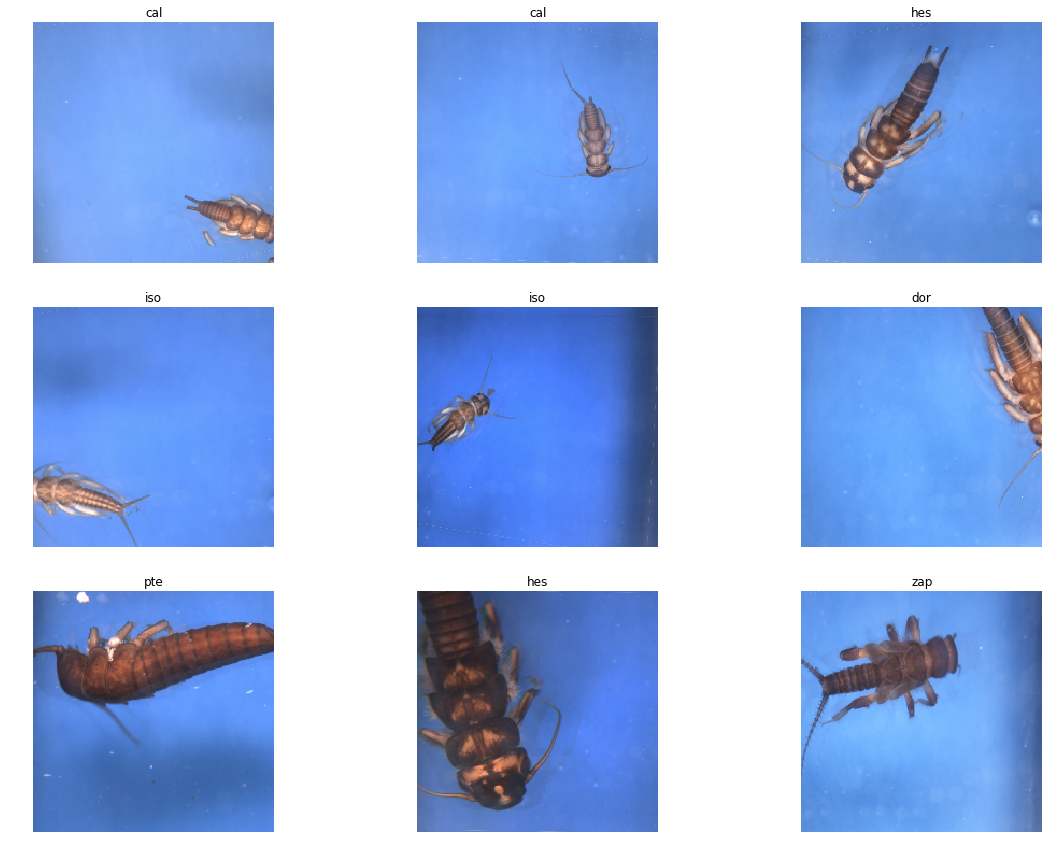

In [16]:
data.show_batch(rows=3, figsize=(17,12))

## ResNet34

### Learner setup

In [88]:
learn = ConvLearner(data, models.resnet34, metrics=accuracy)

### Stage 1 - Training

In [124]:
!gpustat

psbtmxtmo  Fri Oct 26 14:53:00 2018
[0] Quadro P4000     | 68'C,   0 % |  7270 /  8119 MB | paperspace(4445M) paperspace(2815M)


In [89]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


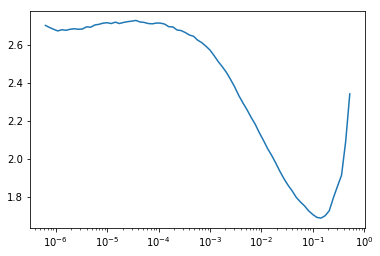

In [90]:
learn.recorder.plot()

In [92]:
lr = 1e-2

In [96]:
!gpustat

psbtmxtmo  Fri Oct 26 14:19:21 2018
[0] Quadro P4000     | 38'C,   0 % |  4778 /  8119 MB | paperspace(3939M) paperspace(829M)


In [93]:
# train for 1 epoch to get a feeling for the losses and the accuracy
learn.fit_one_cycle(1, max_lr=lr)

Total time: 01:20
epoch  train_loss  valid_loss  accuracy
1      0.641965    0.198866    0.934243  (01:20)



In [97]:
# additional training
learn.fit_one_cycle(8, max_lr=lr)

Total time: 04:57
epoch  train_loss  valid_loss  accuracy
1      0.261692    0.158409    0.950372  (00:36)
2      0.247143    0.153286    0.941687  (00:37)
3      0.269598    0.701948    0.826303  (00:37)
4      0.260106    0.087266    0.972705  (00:36)
5      0.198019    0.078771    0.970223  (00:36)
6      0.138786    0.042115    0.987593  (00:37)
7      0.098745    0.034911    0.987593  (00:37)
8      0.084334    0.031462    0.987593  (00:37)



In [103]:
#learn.recorder.plot_losses()

In [99]:
# additional training because training loss is still higher than the validation loss
learn.fit_one_cycle(8, max_lr=lr)

Total time: 05:23
epoch  train_loss  valid_loss  accuracy
1      0.081792    0.084624    0.973945  (00:40)
2      0.113463    0.444896    0.882134  (00:40)
3      0.187874    1.631831    0.713400  (00:39)
4      0.189726    0.250692    0.933002  (00:41)
5      0.156558    0.072536    0.970223  (00:41)
6      0.128971    0.051730    0.981390  (00:39)
7      0.095782    0.022439    0.991315  (00:40)
8      0.063661    0.020630    0.991315  (00:40)



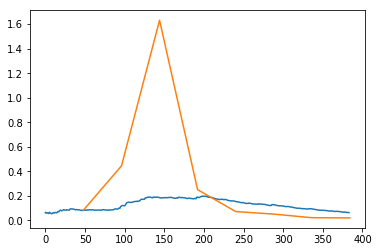

In [100]:
learn.recorder.plot_losses()

In [101]:
learn.fit_one_cycle(8) # without max lr

Total time: 04:57
epoch  train_loss  valid_loss  accuracy
1      0.047429    0.020246    0.992556  (00:40)
2      0.042277    0.019560    0.992556  (00:38)
3      0.049151    0.029027    0.990074  (00:37)
4      0.040677    0.026042    0.991315  (00:37)
5      0.050364    0.032707    0.987593  (00:37)
6      0.046110    0.019432    0.992556  (00:37)
7      0.047327    0.016803    0.993797  (00:35)
8      0.040084    0.016863    0.993797  (00:33)



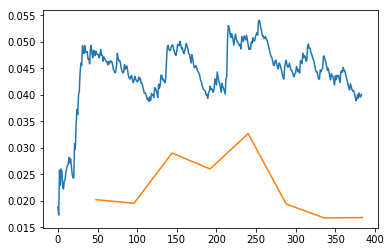

In [102]:
learn.recorder.plot_losses()

In [104]:
learn.fit_one_cycle(8) # without max lr

Total time: 04:35
epoch  train_loss  valid_loss  accuracy
1      0.029799    0.017245    0.993797  (00:36)
2      0.036762    0.029827    0.988834  (00:33)
3      0.042091    0.031756    0.987593  (00:35)
4      0.036180    0.015531    0.996278  (00:34)
5      0.042667    0.016957    0.996278  (00:33)
6      0.038740    0.015304    0.996278  (00:33)
7      0.031231    0.014023    0.996278  (00:35)
8      0.027470    0.013647    0.996278  (00:32)



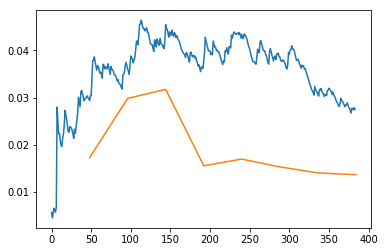

In [105]:
learn.recorder.plot_losses()

In [139]:
learn.save('stonefly_resnet34_stage_1')

### Stage 2

In [126]:
!gpustat

psbtmxtmo  Fri Oct 26 14:55:02 2018
[0] Quadro P4000     | 69'C,  98 % |  7270 /  8119 MB | paperspace(4445M) paperspace(2815M)


In [140]:
learn.load('stonefly_resnet34_stage_1')

In [128]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


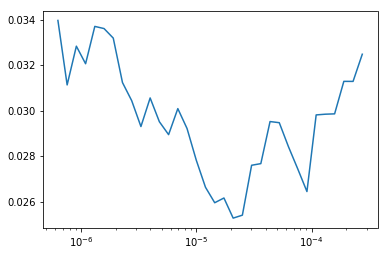

In [129]:
learn.recorder.plot()

In [130]:
lr=1e-5

In [131]:
learn.unfreeze()

In [132]:
learn.fit_one_cycle(1, max_lr=lr)

Total time: 01:01
epoch  train_loss  valid_loss  accuracy
1      0.041091    0.022515    0.992556  (01:01)



In [133]:
learn.fit_one_cycle(3, max_lr=lr)

Total time: 02:23
epoch  train_loss  valid_loss  accuracy
1      0.022157    0.021901    0.991315  (00:57)
2      0.027216    0.027297    0.990074  (00:46)
3      0.024780    0.029803    0.987593  (00:39)



In [134]:
learn.fit_one_cycle(3, max_lr=lr)

Total time: 01:51
epoch  train_loss  valid_loss  accuracy
1      0.031255    0.027060    0.988834  (00:36)
2      0.025145    0.017536    0.995037  (00:37)
3      0.024659    0.020058    0.990074  (00:36)



In [136]:
learn.fit_one_cycle(3, max_lr=lr)

Total time: 02:02
epoch  train_loss  valid_loss  accuracy
1      0.024430    0.017906    0.993797  (00:34)
2      0.028144    0.020577    0.995037  (00:36)
3      0.032005    0.016643    0.995037  (00:52)



In [137]:
learn.save('stonefly_resnet34_stage_2')

## ResNet50

### Learner setup

In [17]:
!gpustat

psbtmxtmo  Fri Oct 26 15:17:52 2018
[0] Quadro P4000     | 46'C,   0 % |   601 /  8119 MB | paperspace(591M)


In [18]:
learn = ConvLearner(data, models.resnet50, metrics=accuracy)

### Stage 1 - Training

In [19]:
!gpustat

psbtmxtmo  Fri Oct 26 15:17:57 2018
[0] Quadro P4000     | 46'C,   0 % |   617 /  8119 MB | paperspace(607M)


In [20]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


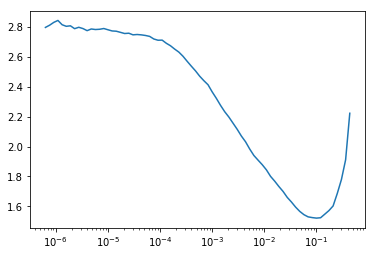

In [21]:
learn.recorder.plot()

In [22]:
lr=1e-2

In [23]:
learn.fit_one_cycle(1, max_lr=lr)

Total time: 00:38
epoch  train_loss  valid_loss  accuracy
1      0.527495    0.201580    0.933060  (00:38)



In [24]:
learn.fit_one_cycle(3, max_lr=lr)

Total time: 01:48
epoch  train_loss  valid_loss  accuracy
1      0.286391    0.708199    0.790984  (00:35)
2      0.271295    0.474193    0.875683  (00:35)
3      0.172210    0.026287    0.990437  (00:36)



In [25]:
learn.fit_one_cycle(8, max_lr=lr)

Total time: 04:53
epoch  train_loss  valid_loss  accuracy
1      0.094921    0.118555    0.957650  (00:36)
2      0.174625    0.628990    0.833333  (00:36)
3      0.209188    0.422344    0.862022  (00:35)
4      0.217224    0.327415    0.896175  (00:35)
5      0.153046    0.256900    0.912568  (00:36)
6      0.102339    0.007763    0.998634  (00:36)
7      0.061359    0.006624    0.997268  (00:37)
8      0.046177    0.005507    0.997268  (00:38)



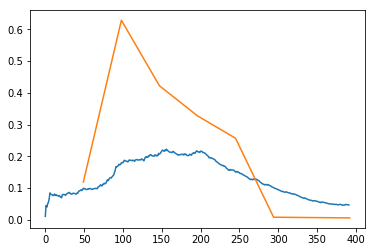

In [26]:
learn.recorder.plot_losses()

In [27]:
learn.fit_one_cycle(8, max_lr=lr)

Total time: 04:52
epoch  train_loss  valid_loss  accuracy
1      0.054960    0.032964    0.984973  (00:36)
2      0.074649    0.142625    0.960383  (00:36)
3      0.167328    0.260295    0.924863  (00:36)
4      0.142912    0.086757    0.972678  (00:35)
5      0.106656    0.088524    0.961749  (00:36)
6      0.070898    0.013499    0.995902  (00:36)
7      0.052464    0.006312    0.998634  (00:35)
8      0.033993    0.006365    0.998634  (00:38)



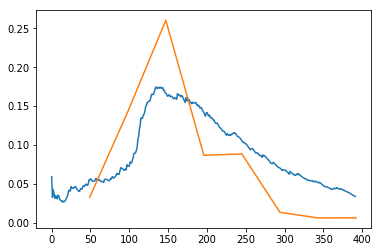

In [28]:
learn.recorder.plot_losses()

In [30]:
learn.save('stonefly_resnet50_stage_1')

### Stage 1 - Interpretation

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

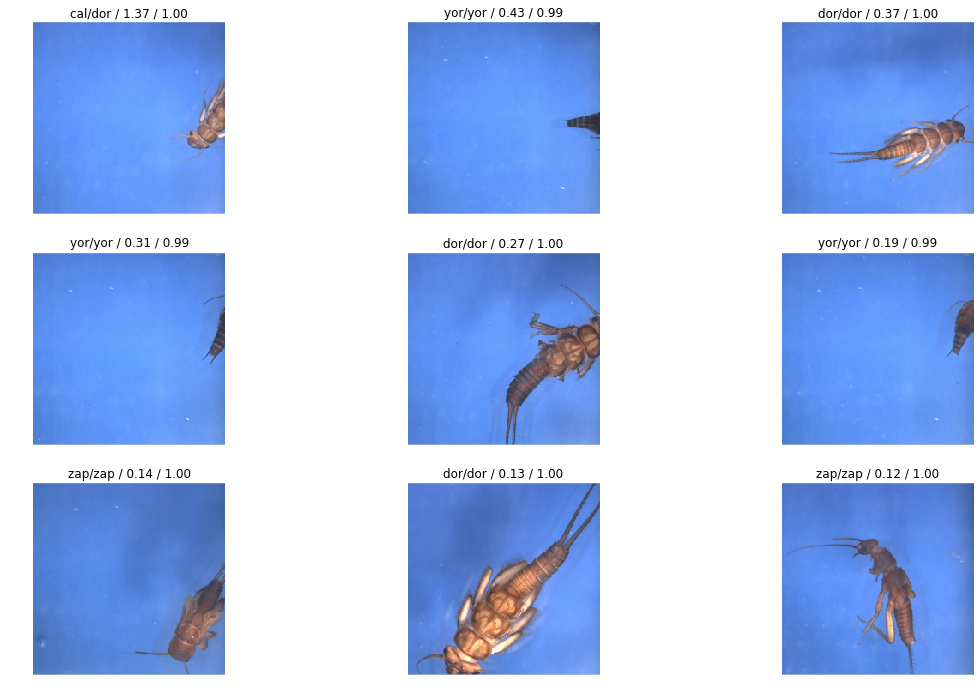

In [32]:
interp.plot_top_losses(9, figsize=(19,12))

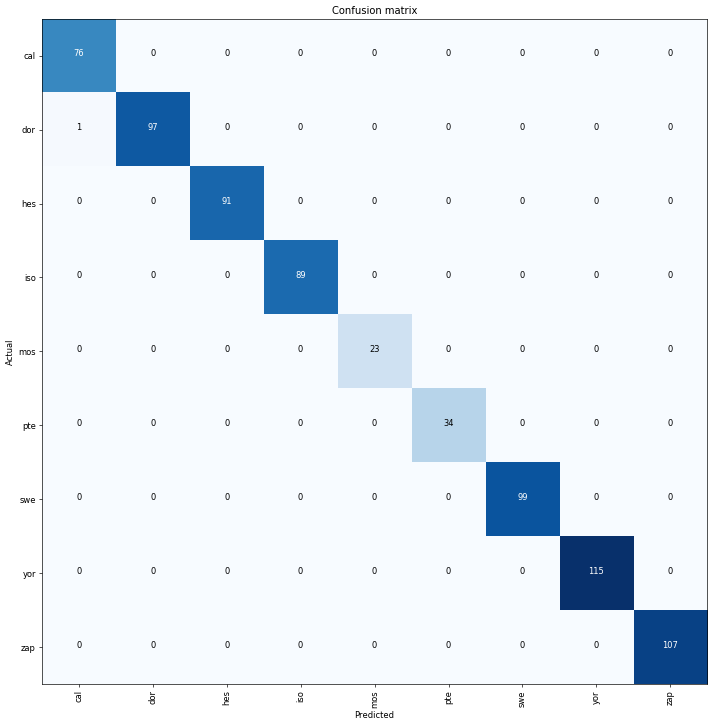

In [34]:
interp.plot_confusion_matrix(figsize=(17,12), dpi=60)

In [37]:
interp.most_confused() # (min_val=2)

[]

### Stage 2 - Training

In [ ]:
learn.load('stonefly_resnet50_stage_1')

In [ ]:
!gpustat

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=

In [ ]:
learn.fit_one_cycle(1, max_lr=lr)

### Stage 2 - Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(19,12))

In [ ]:
interp.plot_confusion_matrix(figsize=(17,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

## In deep interpretation (coming soon)